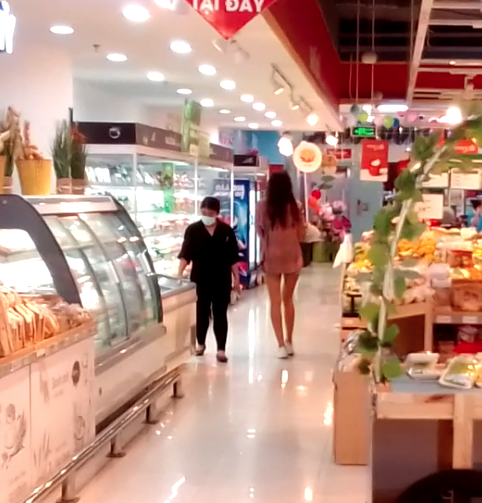

In [220]:
### Load and Display Image from Folder 
from PIL import Image
import os

image = Image.open(os.path.join("Nov17", "vinmart_models.png"))
image = image.convert("RGB")
image

In [221]:
### Load Segmentation Model

from torchvision.models.detection import keypointrcnn_resnet50_fpn, KeypointRCNN_ResNet50_FPN_Weights

weights = KeypointRCNN_ResNet50_FPN_Weights.COCO_V1
model = keypointrcnn_resnet50_fpn(weights=weights)

model.eval().to("cpu")

KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.

In [222]:
### Keypoints and Bounding Box predictions
transforms = weights.transforms()
tensorImage = transforms(image)
predictions = model([tensorImage.to("cpu")])
predictions

[{'boxes': tensor([[1.7611e+02, 1.9549e+02, 2.4223e+02, 3.6327e+02],
          [2.5401e+02, 1.7091e+02, 3.1542e+02, 3.5617e+02],
          [4.6950e+02, 1.9922e+02, 4.8169e+02, 2.3134e+02],
          [3.9509e+02, 4.6785e+02, 4.8137e+02, 5.0255e+02],
          [3.2915e+02, 2.0637e+02, 3.5334e+02, 2.7157e+02],
          [3.0822e+02, 1.8833e+02, 3.2375e+02, 2.2937e+02],
          [7.0812e+01, 3.6460e+02, 2.8508e+02, 4.9737e+02],
          [2.3020e+02, 2.1753e+02, 2.4916e+02, 2.8931e+02],
          [4.6568e+02, 1.9819e+02, 4.7801e+02, 2.2713e+02],
          [5.1685e+01, 1.0821e+02, 8.1177e+01, 1.9501e+02],
          [3.2759e+02, 2.0317e+02, 3.4696e+02, 2.5235e+02],
          [1.4280e+02, 4.0240e+02, 1.5121e+02, 4.2288e+02],
          [3.0404e+02, 1.8567e+02, 3.2577e+02, 2.4894e+02],
          [2.3204e+02, 1.9402e+02, 2.4912e+02, 2.6569e+02],
          [3.1104e+02, 1.8801e+02, 3.2155e+02, 2.0011e+02],
          [2.3150e+02, 2.4896e+02, 2.4838e+02, 2.9784e+02],
          [4.7295e+02, 2.0225e+

In [223]:
### Find Bounding Box Position of main Targets
from matplotlib import pyplot as plt
import math

scores = predictions[0]['scores']
boxes = predictions[0]['boxes']
idx = torch.where(scores > 0.92)
main_boxes = torch.unsqueeze(boxes[idx], dim=0).cpu().detach().numpy()

positions = []

for i, box in enumerate(main_boxes[0]):
    positions.append((tuple(box)))

positions

[(176.10916, 195.49435, 242.22707, 363.2667),
 (254.01138, 170.90576, 315.41916, 356.1744)]

Chart 1 3
Image for 0 0 (176.10916, 195.49435, 242.22707, 363.2667)
Image for 0 1 (254.01138, 170.90576, 315.41916, 356.1744)


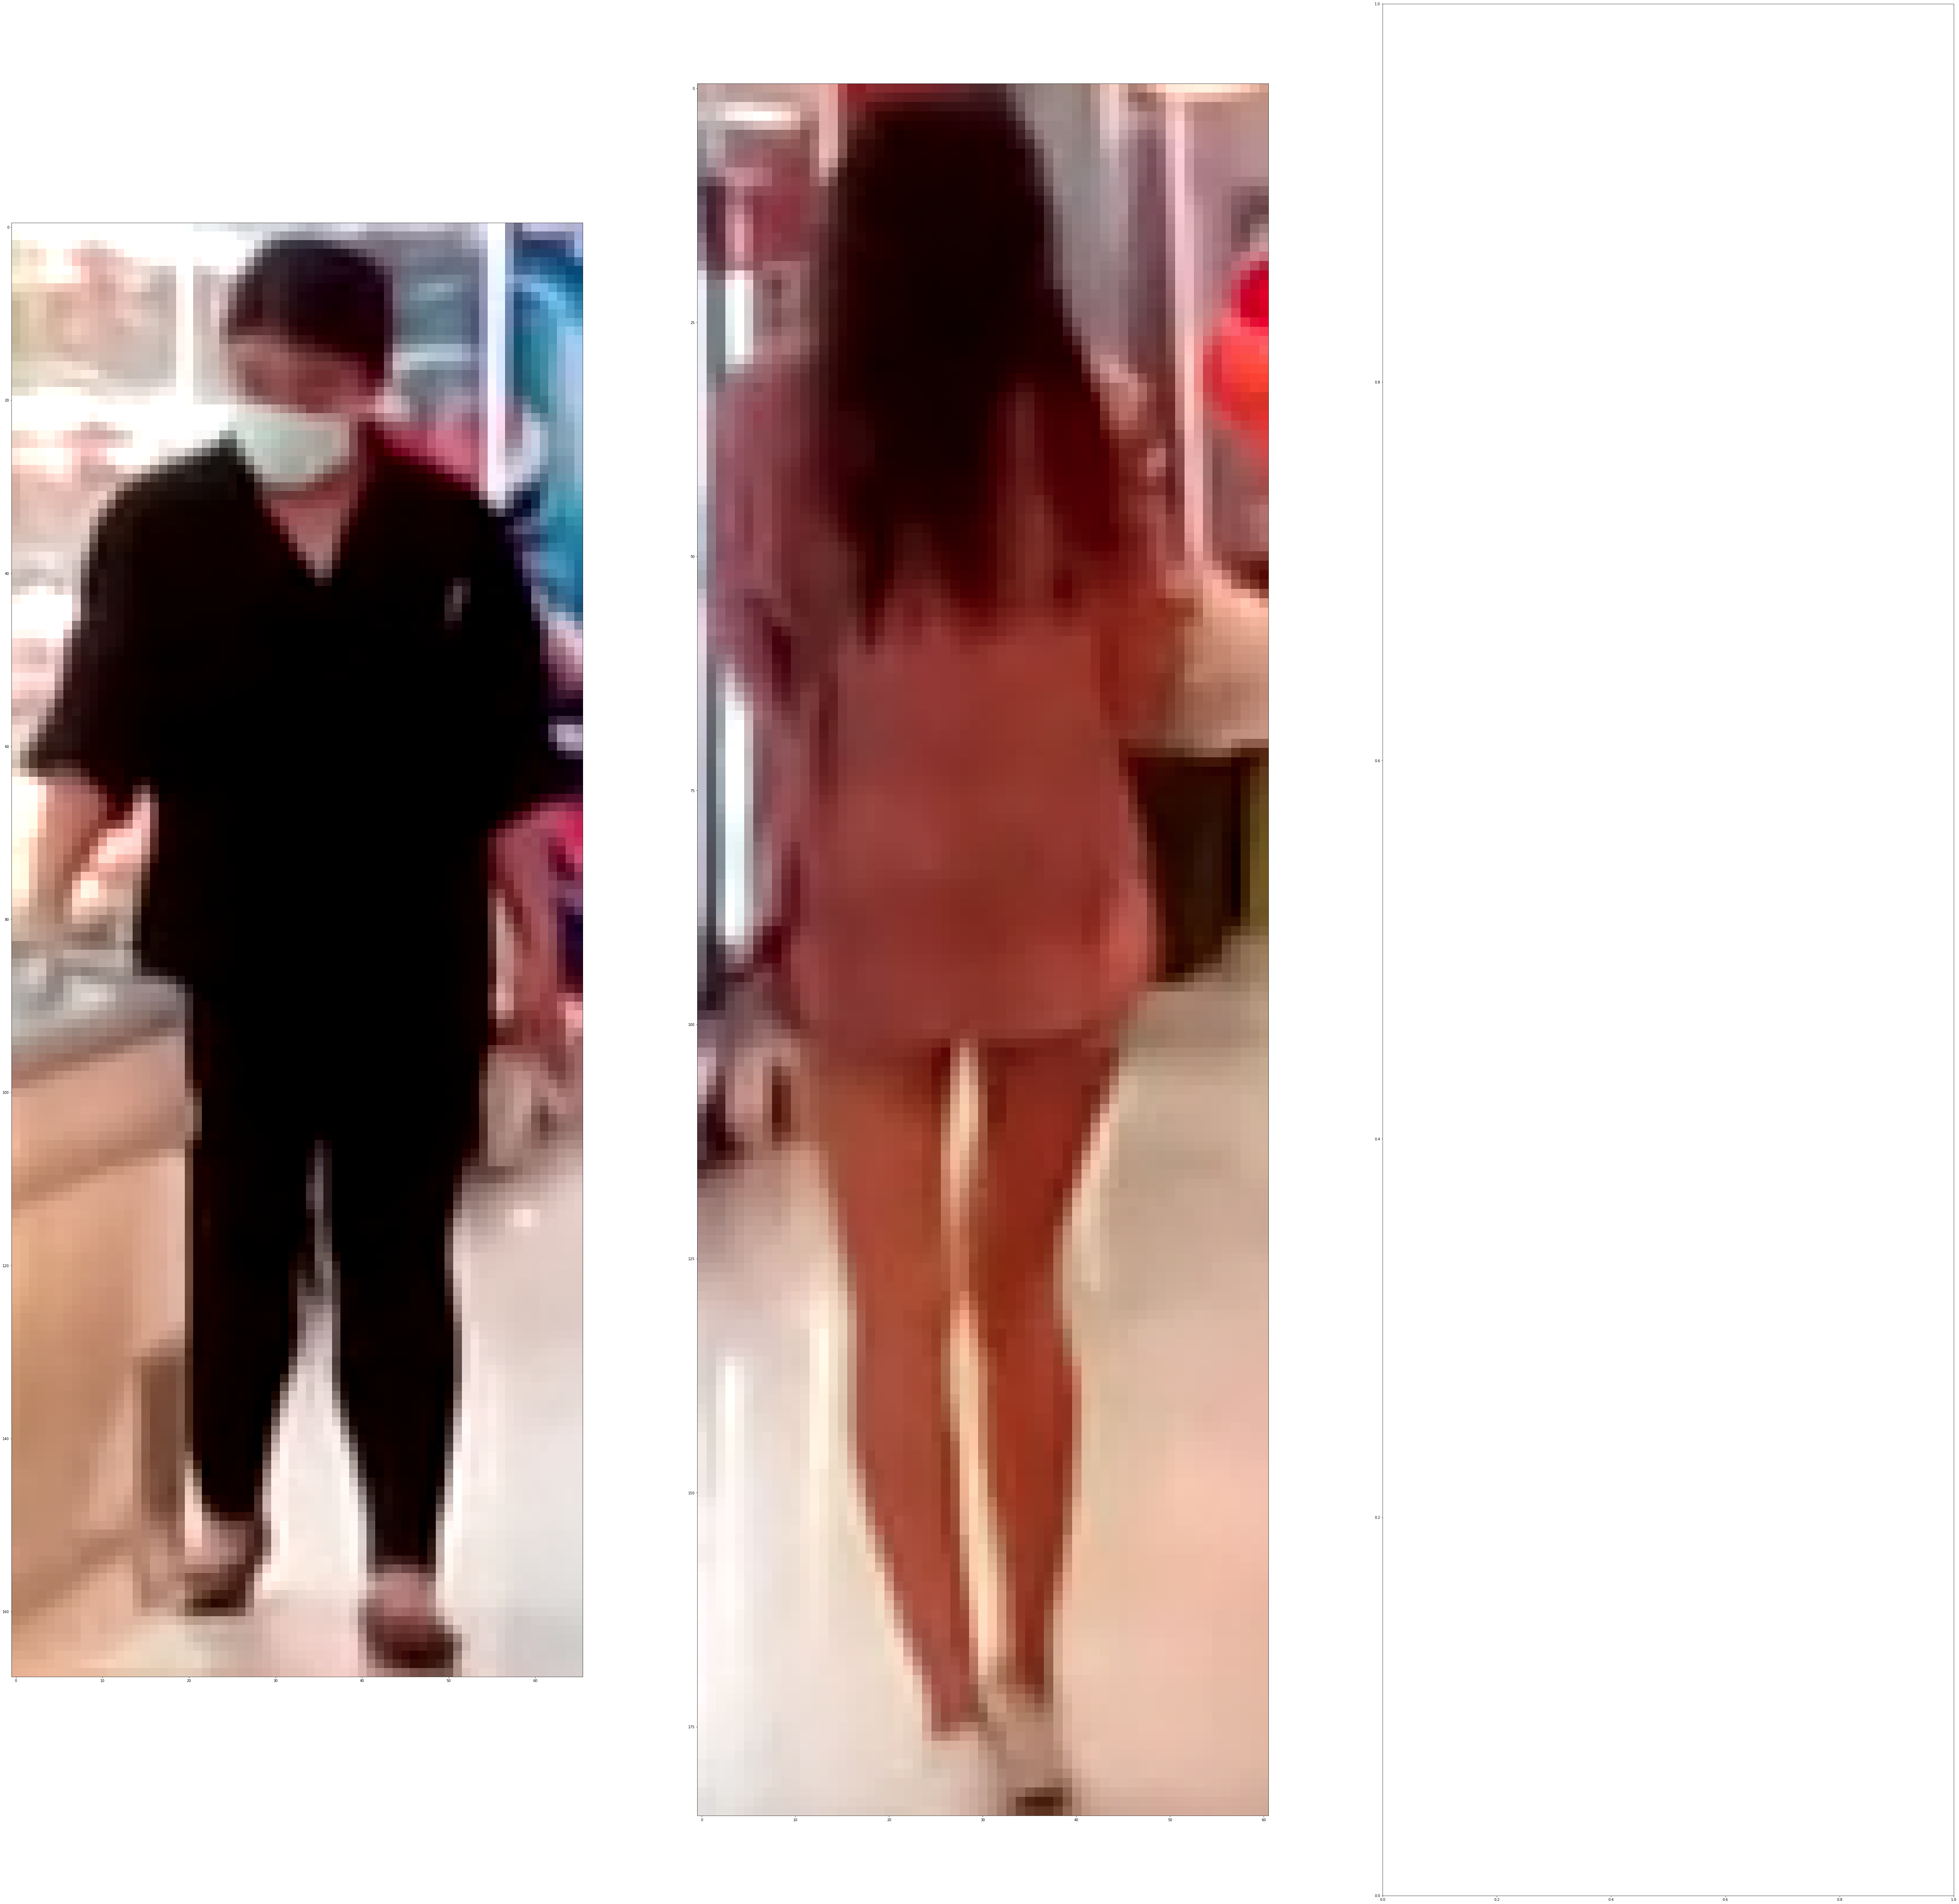

In [224]:
### Display Bounding Box
count = len(positions)
ncols = 3
nrows = math.ceil(count/ncols)

fig, axis = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_figwidth(100)
fig.set_figheight(100)

for idx, pos in enumerate(positions):
    person = image.crop(pos)
    row = math.floor(idx/ncols)
    col = idx%ncols
    print("Image for", row, col, pos)
    if nrows < 2:
        cell = axis[col]
        cell.imshow(person)
    else :
        cell = axis[row, col]
        cell.imshow(person)